# Notebook  12 - Basi di Deep e Convolutional Neural Network

Questa lezione utilizza le librerie Keras e Tensorflow per risolvere un problema elementare di classificazione, ovvero il riconoscimento delle cifre tramite il database di immagini MNIST, attraverso le reti neurali profonde e convoluzionali.

   - [  12.1 - Deep Neural Network ](#ex-12.1) 

   - [  12.2 - Convolutional Neural Network ](#ex-12.2) 
   
   - [  12.3 - Riconoscimento Cifre ](#ex-12.3)
   

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from IPython.display import HTML
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from PIL import Image

<a id="ex-12.1"></a>
## Esercizio 12.1 - Deep Neural Network
Il primo esercizio consiste nel determinare quali siano i parametri migliori per il problema in analisi, ovvero il riconoscimento di cifre a partire da un'immagine. Le immagini sono prese dal dataset del MNIST, che contiene più di 60'000 immagini di cifre, in formato $28x28px$. Questo primo esercizio mira ad ottimizzare la rete fornitaci, determinando quale <b> numero di epoche </b> e <b> ottimizzatore </b> siano migliori.
</br> 
L'ottimizzatore, che viene fornito nella libreria `keras.optimizers`, è il metodo secondo cui si svolge la discesa del gradiente. Infatti, una volta determinata la funzione di costo, l'obiettivo della rete è minimizzarla, e per fare ciò si muove lungo il gradiente della suddetta funzione rispetto ai parametri che la compongono, fino a trovare il set che la minimizza. Questo movimento lungo il gradiente può essere fatto in diversi modi, che sono quelli che verranno esplorati in questa esercitazione.
- SGD (Stochastic Gradient Descent): consiste nella discesa del gradiente più elementare, i parametri vengono riaggiornati sempre secondo un rate fisso nella direzione del gradiente della funzione di costo.
- Adam (Adaptive Moment Estimation): alla discesa elementare viene aggiunto un termine "d'inerzia", ovvero una memoria delle direzioni passate in cui ci si è mossi. Il <i> learning rate </i>, ovvero il movimento nello spazio dei parametri, è anche riadattato ad ogni parametro singolarmente, e non uguale per tutti.
- RMSprop (Root Mean Square Propagation): il <i> learning rate </i> di ogni parametro viene riadattato in base al gradiente, muovendosi quindi in maniera diversa a seconda della pendenza nello spazio dei parametri. È il concetto adottato anche nel Notebook 8 per la legge di aggiornamento del Simulated Annealing.
- Adagrad (Adaptive Gradient Algorithm), Adadelta, Adamax, Nadam: sono tutte varianti del metodo Adam che tengono conto di ulteriori parametri. 

Questo esercizio mira a testare alcuni di questi ottimizzatori e determinare quale sia il migliore per il caso in questione.

Model compiled successfully and ready to be trained.
Epoch 1/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.2881 - acc: 0.9159 - val_loss: 0.1238 - val_acc: 0.9623
Epoch 2/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.1280 - acc: 0.9641 - val_loss: 0.0977 - val_acc: 0.9708
Epoch 3/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.0916 - acc: 0.9744 - val_loss: 0.0799 - val_acc: 0.9767
Epoch 4/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.0769 - acc: 0.9786 - val_loss: 0.0790 - val_acc: 0.9785
Epoch 5/5
313/313 [==============================] - 0s 374us/step - loss: 0.0853 - acc: 0.9778

Test loss: 0.08529836684465408
Test accuracy: 0.9778000116348267


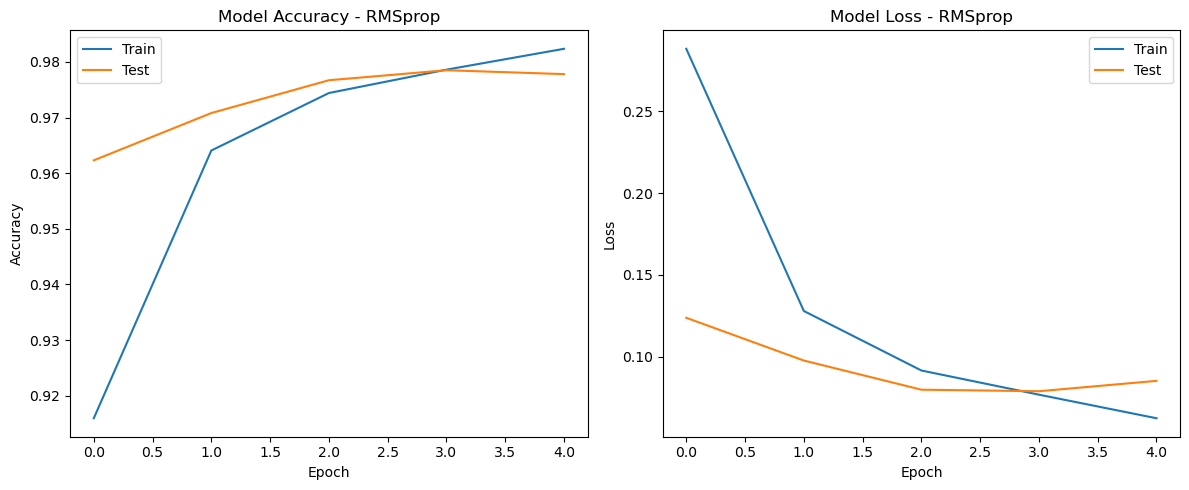

313/313 [==============================] - 0s 399us/step


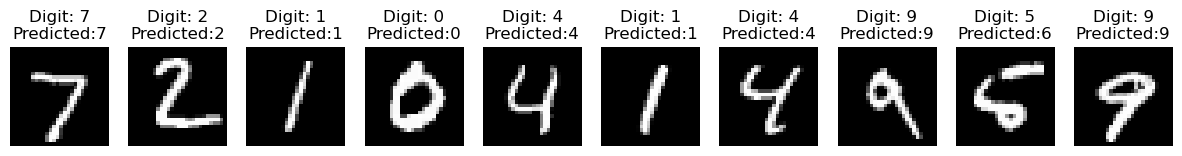

In [3]:
# Set environment variable for MacOSX and Anaconda installation
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # Leave it commented if not required

# Set random seed for reproducibility
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Input image dimensions
img_rows, img_cols = 28, 28

# Output classes
num_classes = 10

# Load and split the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape data based on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

# Convert data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale data to range [0, 1]
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

def create_DNN():
    # Instantiate the model
    model = Sequential()
    # Add a dense all-to-all ReLU layer
    model.add(Dense(400, input_shape=(img_rows * img_cols,), activation='relu'))
    # Add another dense all-to-all ReLU layer
    model.add(Dense(100, activation='relu'))
    # Apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # Softmax layer for output
    model.add(Dense(num_classes, activation='softmax'))

    return model

def compile_model():
    model = create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.legacy.Adadelta(learning_rate=1),
                  metrics=['acc'])
    return model

# Create and compile the model
model = compile_model()

# Print status message
print('Model compiled successfully and ready to be trained.')

# Training parameters
batch_size = 32
epochs = 5

# Train the DNN and store training info in history
history = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, Y_test))

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training history
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for accuracy and loss
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
axes[0].plot(accuracy)
axes[0].plot(val_accuracy)
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].set_title('Model Accuracy - RMSprop')

# Plot loss
axes[1].plot(loss)
axes[1].plot(val_loss)
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='best')
axes[1].set_title('Model Loss - RMSprop')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

predictions = model.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [4]:
from IPython.display import HTML

# Define the paths to the four images in PNG format
image_paths = ['images/optimizers/sgd.png', 'images/optimizers/adam.png', 'images/optimizers/rmsprop.png', 'images/optimizers/adadelta.png']

# Generate the HTML code for the image grid
html_code = '<div style="display: flex; flex-wrap: wrap;">'
for path in image_paths:
    html_code += f'<div style="flex: 0 0 50%;"><img src="{path}" style="width: 100%;"></div>'
html_code += '</div>'

# Display the HTML code
HTML(html_code)


I risultati mostrano che a parità di epoche ($5$), gli ottimizzatori hanno tutti delle performance soddisfacenti, con accuratezze superiori al $95\%$, come si vede anche dal fatto che riescono a prevedere correttamente tutte le cifre. Il più accurato di tutti è `Adadelta`, motivo per il quale si sono condotti dei test ulteriori con questo ottimizzatore, variando il numero di epoche. I risultati mostrano che aumentando le epoche l'accuratezza aumenta, mostrando in particolare un ottima concordanza per i dataset di training e di test nel caso di $20$ epoche. Tuttavia il miglioramento rispetto al caso con $5$ epoche non è così drastico da bilanciare l'aumento del tempo di esecuzione.

In [5]:
# Define the paths to the four images in PNG format
image_paths = ['images/optimizers/adadelta_10.png', 'images/optimizers/adadelta_20.png']
# Generate the HTML code for the image grid
html_code = '<div style="display: flex; flex-wrap: wrap;">'
for path in image_paths:
    html_code += f'<div style="flex: 0 0 50%;"><img src="{path}" style="width: 100%;"></div>'
html_code += '</div>'

# Display the HTML code
HTML(html_code)

<a id="ex-12.2"></a>
## Esercizio 12.2 - Convolutional Neural Network
Si vuole ora riadattare la rete neurale utilizzata per renderla una <i> rete neurale convoluzionale </i>, ovvero una rete specializzata nel riconoscimento di immagini e pattern. Per farlo sostituiremo i layer `Dense()` della DNN con i seguenti:
- `Conv2D`: è il layer fondamentale delle CNN, che opera applicando dei filtri alle immagini fornite, cercando di riconoscerne dei pattern comuni (linee verticali, linee orizzontali..) che possano poi fungere da discrimine per il riconoscimento.
- `MaxPooling2D`: riduce le dimensioni delle immagini fornite, eliminando le caratteristiche inutili e mantenendo quelle utili ai fini del riconoscimento
- `Dropout`: spegne randomicamente alcuni nodi, obbligando gli altri a lavorare senza un pezzo della rete. Questo è utile a far sì che la rete impari a lavorare anche in situazioni non ottimali, impedendo che il risultato dipenda troppo dall'architettura della rete.
- `Flatten`: converte input multi-dimensionali in un array unidimensionale, e serve da "ponte" tra la struttura CNN della prima parte della rete e quella DNN dell'ultima.
- `Dense`, `soft-max`: sono i layer classici delle reti neurali, presenti anche nella DDN


Model compiled successfully and ready to be trained.
Epoch 1/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1643 - accuracy: 0.9485 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 2/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 3/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0242 - val_accuracy: 0.9930
Epoch 4/20
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.0194 - val_accuracy: 0.9939
Epoch 5/20
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0272 - accuracy: 0.9920 - val_loss: 0.0205 - val_accuracy: 0.9934
Epoch 6/20
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0197 - val_accuracy: 0.9945
Epoch 7/20
1875/1875 [==============================] - 105s 56ms/step 

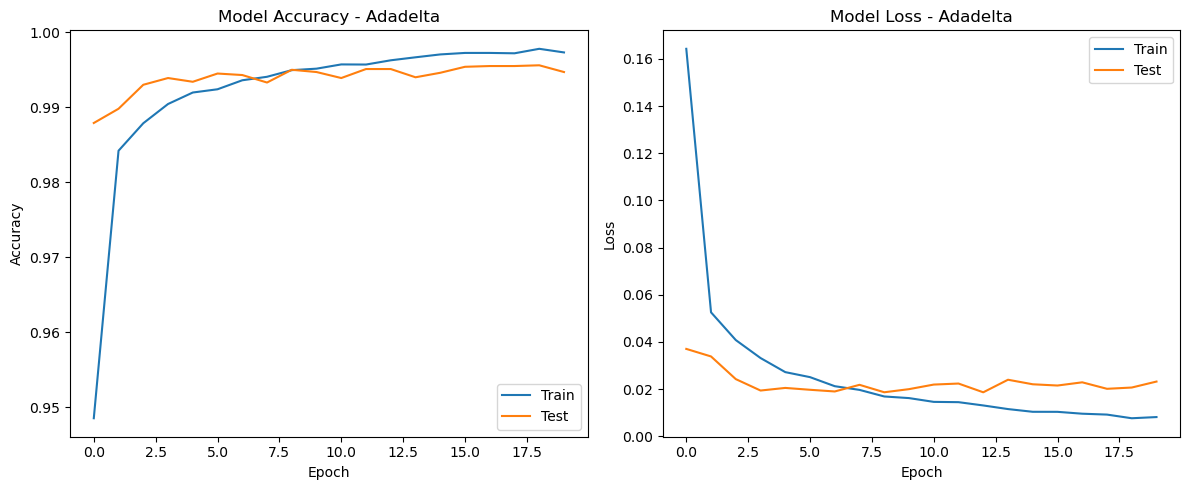

313/313 [==============================] - 5s 17ms/step


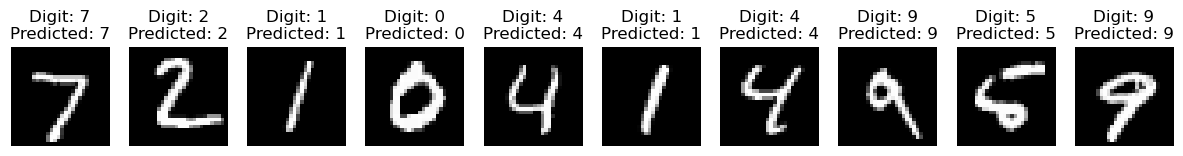

In [6]:
# Set environment variable for MacOSX and Anaconda installation
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # Leave it commented if not required

# Set random seed for reproducibility
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Output classes
num_classes = 10

# Load and split the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape data based on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# Convert data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale data to range [0, 1]
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

def create_CNN():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model



def compile_model():
    model = create_CNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.legacy.Adadelta(learning_rate=1),
                  metrics=['accuracy'])
    return model

# Create and compile the model
model_CNN = compile_model()

# Print status message
print('Model compiled successfully and ready to be trained.')

# Training parameters
batch_size = 32
epochs = 20

# Train the CNN and store training info in history
history = model_CNN.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, Y_test))

# Evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for accuracy and loss
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
axes[0].plot(accuracy)
axes[0].plot(val_accuracy)
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].set_title('Model Accuracy - Adadelta')

# Plot loss
axes[1].plot(loss)
axes[1].plot(val_loss)
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='best')
axes[1].set_title('Model Loss - Adadelta')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()


Dato l'alto tempo di esecuzione, si riportano i risultati per $5$ epoche. Aumentare il numero di epoche ha poco senso, dato che l'accuratezza è gia ottima (superiore al $98\%$).

<a id="ex-12.3"></a>
## Esercizio 12.3 - Riconoscimento Cifre
Si vuole ora provare ad applicare la rete neurale costruita alle cifre scritte dal sottoscritto, non presenti nel dataset del MNIST, e vedere se la rete è in grado di riconoscerle. I risultati sono stati soddisfacenti: la rete ha riconosciuto tutte le cifre.
Dato che la scrittura di questo programma ha destato molta curiosità in aula studio, molti hanno voluto provarla. Avere dati in più, per situazioni come quella in esame, non è mai un male, quindi ho pensato che mostrare i risultati ottenuti da tutti gli amici che hanno voluto testare la rete non fosse una cattiva idea.

1/1 [==============================] - 0s 6ms/step


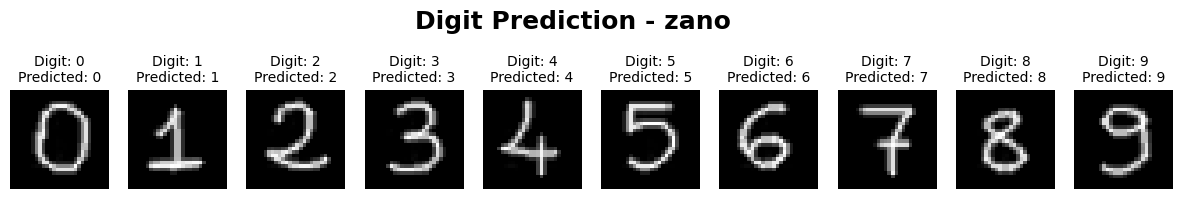

In [23]:
name = "zano"

digit_filenames = [
    "images/friends/" + name + "-digits/0.png",
    "images/friends/" + name + "-digits/1.png",
    "images/friends/" + name + "-digits/2.png",
    "images/friends/" + name + "-digits/3.png",
    "images/friends/" + name + "-digits/4.png",
    "images/friends/" + name + "-digits/5.png",
    "images/friends/" + name + "-digits/6.png",
    "images/friends/" + name + "-digits/7.png",
    "images/friends/" + name + "-digits/8.png",
    "images/friends/" + name + "-digits/9.png",
]
data = []

for digit_filename in digit_filenames:
    digit_in = Image.open(digit_filename).convert('L')

    xdim, ydim = digit_in.size
    img = np.zeros((ydim, xdim))
    for j in range(ydim):
        for i in range(xdim):
            img[j, i] = digit_in.getpixel((i, j)) / 255
    data.append(img)

predictions = []
for i in range(10):
    data[i] = data[i].reshape(1, img_rows, img_cols, 1)
    prediction = model_CNN.predict(data[i])
    predictions.append(prediction)
    data[i] = data[i].reshape(img_rows, img_cols)

plt.figure(figsize=(15, 4))
plt.suptitle("Digit Prediction - " + name , fontsize=18, fontweight='bold')
plt.subplots_adjust(top=1.2)  # Adjust the top position of the plot

for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title("Digit: " + str(i) + "\nPredicted: {}".format(np.argmax(predictions[i])), fontsize=10)
    plt.axis('off')

plt.show()

In [25]:
# Define the paths to the four images in PNG format
image_paths = ['images/predictions/zano.png', 'images/predictions/bea.png',
               'images/predictions/chiara.png', 'images/predictions/dave.png',
               'images/predictions/dech.png', 'images/predictions/eli.png',
               'images/predictions/fede.png','images/predictions/giorgio.png',
               'images/predictions/guido.png', 'images/predictions/karna.png',
               'images/predictions/mandra.png', 'images/predictions/meli.png',
               'images/predictions/nico.png', 'images/predictions/smdp.png',
               'images/predictions/sofi.png', 'images/predictions/tommo.png']
# Generate the HTML code for the image grid
html_code = '<div style="display: flex; flex-wrap: wrap;">'
for path in image_paths:
    html_code += f'<div style="flex: 0 0 50%;"><img src="{path}" style="width: 100%;"></div>'
html_code += '</div>'

# Display the HTML code
HTML(html_code)